In [17]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import glob


model = VGG16(weights='imagenet')
model.summary()
path = 'G:\Photographs\ResNet\\'
images_path = glob.glob(path + "*.jpg")
images_path.extend(glob.glob(path+"*.PNG"))
for img_path in sorted(images_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    
    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=1)[0])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
print(glob.glob(path + "*.jpg"))

['G:\\Photographs\\ResNet\\Car_1resize.jpg', 'G:\\Photographs\\ResNet\\Car_2resize.jpg', 'G:\\Photographs\\ResNet\\Car_3resize.jpg', 'G:\\Photographs\\ResNet\\Car_4resize.jpg', 'G:\\Photographs\\ResNet\\Car_5resize.jpg', 'G:\\Photographs\\ResNet\\Cat(Kidding)_5.jpg', 'G:\\Photographs\\ResNet\\Cat_2.jpg', 'G:\\Photographs\\ResNet\\Cat_3.jpg', 'G:\\Photographs\\ResNet\\Cat_4.jpg', 'G:\\Photographs\\ResNet\\Food_1resize.jpg', 'G:\\Photographs\\ResNet\\Food_2resize.jpg', 'G:\\Photographs\\ResNet\\Food_3resize.jpg', 'G:\\Photographs\\ResNet\\Food_4resize.jpg', 'G:\\Photographs\\ResNet\\Food_5resize.jpg', 'G:\\Photographs\\ResNet\\Mountain_1resize.jpg', 'G:\\Photographs\\ResNet\\Mountain_2resize.jpg', 'G:\\Photographs\\ResNet\\Mountain_3resize.jpg', 'G:\\Photographs\\ResNet\\Mountain_4resize.jpg', 'G:\\Photographs\\ResNet\\Mountain_5resize.jpg']


Found 16160 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________

Epoch 1/10


 - 218s - loss: 0.1386 - acc: 0.9530 - val_loss: 0.0988 - val_acc: 0.9650
Epoch 2/10


 - 219s - loss: 0.0843 - acc: 0.9742 - val_loss: 0.1897 - val_acc: 0.9675
Epoch 3/10


 - 223s - loss: 0.0869 - acc: 0.9748 - val_loss: 0.1801 - val_acc: 0.9613
Epoch 4/10


 - 216s - loss: 0.0905 - acc: 0.9754 - val_loss: 0.2457 - val_acc: 0.9437
Epoch 5/10


 - 214s - loss: 0.0765 - acc: 0.9789 - val_loss: 0.1359 - val_acc: 0.9637
Epoch 6/10


 - 209s - loss: 0.0717 - acc: 0.9802 - val_loss: 0.1594 - val_acc: 0.9750
Epoch 7/10


 - 220s - loss: 0.0741 - acc: 0.9809 - val_loss: 0.1185 - val_acc: 0.9750
Epoch 8/10


 - 219s - loss: 0.0715 - acc: 0.9823 - val_loss: 0.1675 - val_acc: 0.9625
Epoch 9/10


 - 221s - loss: 0.0785 - acc: 0.9805 - val_loss: 0.1202 - val_acc: 0.9775
Epoch 10/10


 - 226s - loss: 0.0719 - acc: 0.9832 - val_loss: 0.1647 - val_acc: 0.9738



'#evaluate on test set\nscore = cnn.evaluate(X_test, y_test, verbose = 0)\n#plot histogram\n\npreds = np.argmax(cnn.predict(X_test), axis = 1)\ny_orig = np.argmax(y_test, axis = 1)\ncm = confusion_matrix(preds, y_orig)'

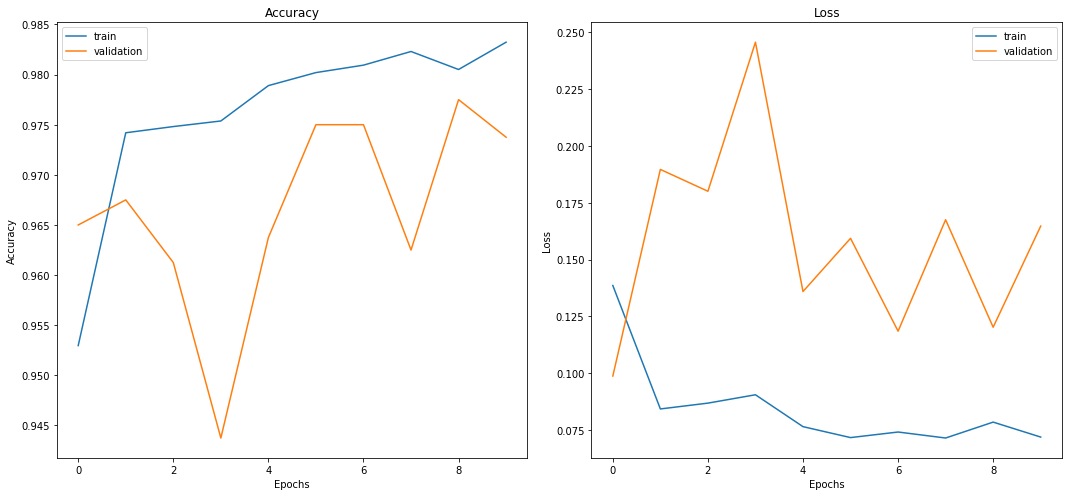

In [41]:
#Dummy Tunning: Replace the top 3 layers with a dense connected network with 2 softmax outputs

from keras.models import Model, Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from keras_tqdm import TQDMNotebookCallback
import numpy as np
import glob
import sys
from datetime import datetime

channel = 3; img_rows = 224; img_cols = 224

"""model = VGG16(weights = 'imagenet', include_top=False, input_shape=(img_rows, img_cols, channel))"""
VGG = VGG16(weights = 'imagenet', input_shape=(img_rows, img_cols, channel))

model = Sequential()
for layer in VGG.layers:
    model.add(layer)

exec_time = datetime.now().strftime('%Y%m%d%H%M%S')
num_class = 2
rate_learning = 0.001
epoch = 10
batch_size = 32

trainPath = 'G:\\Photographs\\MIO_TCV_Classif\\train_car_bus'
validationPath = 'G:\\Photographs\\MIO_TCV_Classif\\validation_car_bus'
testPath = 'G:\\Photographs\\MIO_TCV_Classif\\test_car_bus'
#cls = ['pedestrian', 'bicycle', 'car', 'bus']
cls = ['bus', 'car']
#trainBatches = ImageDataGenerator().flow_from_directory(trainPath, target_size=(224, 224), class_mode="binary", batch_size=16)
#validationBatches = ImageDataGenerator().flow_from_directory(validationPath, target_size=(224, 224), class_mode="binary", batch_size=16)
#testBatches = ImageDataGenerator().flow_from_directory(testPath, target_size=(224, 224), class_mode="binary", batch_size=16)

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10., horizontal_flip=True)

trainBatches = gen.flow_from_directory(trainPath, target_size=(224, 224), classes=cls, batch_size=16)
validationBatches = gen.flow_from_directory(validationPath, target_size=(224, 224), classes=cls, batch_size=16)
testBatches = gen.flow_from_directory(testPath, target_size=(224, 224), classes=cls, batch_size=16)

#ata_imgs, data_classes = next(trainBatches)


model = Model(model.input, model.layers[-2].get_output_at(-1))
last = model.output
preds = Dense(num_class, activation='softmax', name='predictions')(last)

"""model.outputs = model.layers[-1].get_output_at(-1)
model.layers[-1].outbound_nodes = []print(len(model.layers[len(model.layers)-1].inbound_nodes))
model.outputs = Flatten(name='flatten')(model.layers[-1].output)
model.layers[-1].outbound_nodes = []"""

"""
last = model.output
x = Flatten(input_shape=model.output_shape[1:])(last)
preds = Dense(num_class, activation='softmax')(x)
model = Model(model.input, preds)
print("")
"""
"""
model.layers.pop()
model.add(Dense(num_class, activation='softmax'))
"""
"""x = Flatten(name='flatten')(model.output)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(num_class, activation='softmax', name='predictions')(x)
"""

model = Model(inputs= model.input, outputs=preds)

for layer in model.layers[:-1]:
    layer.trainable = False
model.summary()
#sgd = SGD(lr=rate_learning, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(Adam(lr=rate_learning), loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit_generator(trainBatches, steps_per_epoch=1010,
                    validation_data=validationBatches, validation_steps=50,epochs=epoch, verbose=2, callbacks=[TQDMNotebookCallback()])



plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('G:\Documents\jupyterOut\RCV_Project\\Hist{}.png'.format(exec_time), format='png', bbox_inches='tight')
"""#evaluate on test set
score = cnn.evaluate(X_test, y_test, verbose = 0)
#plot histogram

preds = np.argmax(cnn.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)"""




#print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))
#predictions = model.predict(testBatches, )


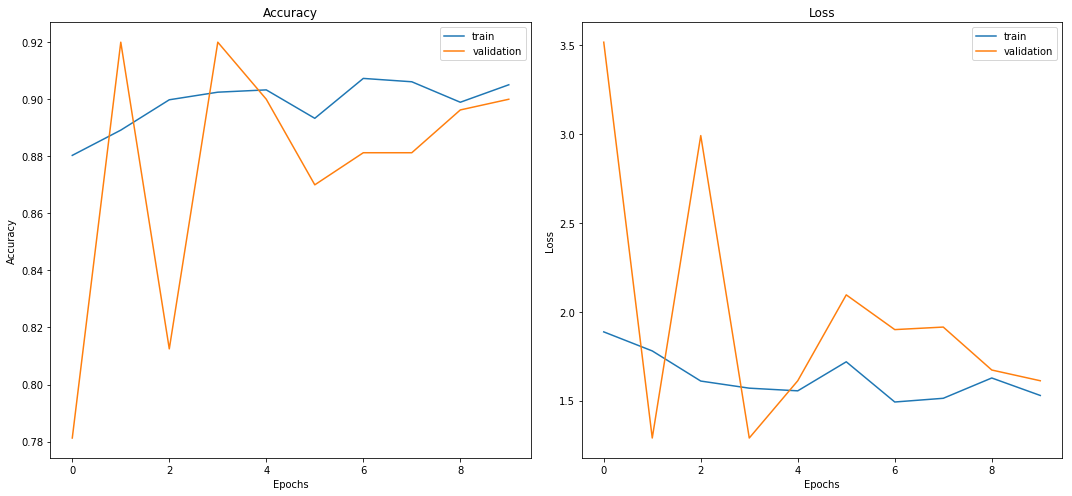

In [40]:
from datetime import datetime
exec_time = datetime.now().strftime('%Y%m%d%H%M%S')
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('G:\Documents\jupyterOut\RCV_Project\\Hist{}.png'.format(exec_time), format='png', bbox_inches='tight')

Found 40 images belonging to 2 classes.
1/1 [==============================] - 1s 607ms/step
Confusion matrix, without normalization
[[20  0]
 [ 2 18]]


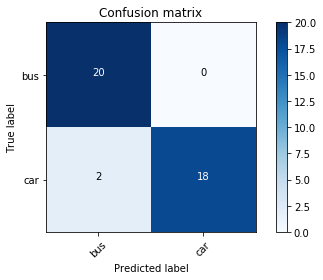

In [42]:
import itertools
from sklearn.metrics import confusion_matrix
testBatches = ImageDataGenerator().flow_from_directory(testPath, target_size=(224, 224), classes=cls, batch_size=40, shuffle=False)
#model.evaluate_generator(testBatches, steps = 1, verbose = 1)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('G:\Documents\jupyterOut\RCV_Project\\ConfuMat{}.png'.format(exec_time), format='png', bbox_inches='tight')


pred = model.predict_generator(testBatches, steps = 1, verbose = 1)
y = []
for i in range (len(testBatches)):
    y.extend(testBatches[i][1])

y = np.asarray(y)
#print(testBatches.filenames)
#print(pred)
#print(y)
cm = confusion_matrix(y[:, 0], np.round(pred[:,0]))
plot_confusion_matrix(cm, ['bus', 'car'])


In [22]:
print(testBatches.class_indices)
print(testBatches.filenames)

{'bus': 0, 'car': 1}
['bus\\00266887.jpg', 'bus\\00266893.jpg', 'bus\\00266981.jpg', 'bus\\00266999.jpg', 'bus\\00267010.jpg', 'bus\\00267066.jpg', 'bus\\00267088.jpg', 'bus\\00267105.jpg', 'bus\\00267154.jpg', 'bus\\00267174.jpg', 'bus\\00267222.jpg', 'bus\\00267263.jpg', 'bus\\00267265.jpg', 'bus\\00267267.jpg', 'bus\\00267353.jpg', 'bus\\00267357.jpg', 'bus\\00267361.jpg', 'bus\\00267422.jpg', 'bus\\00267493.jpg', 'bus\\00267582.jpg', 'car\\00000004.jpg', 'car\\00000006.jpg', 'car\\00000008.jpg', 'car\\00000011.jpg', 'car\\00000012.jpg', 'car\\00000013.jpg', 'car\\00000016.jpg', 'car\\00000017.jpg', 'car\\00000021.jpg', 'car\\00000022.jpg', 'car\\00000027.jpg', 'car\\00000030.jpg', 'car\\00000031.jpg', 'car\\00000036.jpg', 'car\\00000037.jpg', 'car\\00000041.jpg', 'car\\00000042.jpg', 'car\\00000050.jpg', 'car\\00000052.jpg', 'car\\00000053.jpg']


In [23]:
print(pred)
print(np.argmax(pred, axis = 1))

[[1.00000000e+00 5.95498848e-15]
 [1.00000000e+00 1.48939290e-23]
 [2.32126094e-05 9.99976754e-01]
 [1.00000000e+00 3.80520183e-29]
 [1.00000000e+00 7.44792030e-22]
 [1.00000000e+00 1.01478360e-22]
 [1.57603225e-07 9.99999881e-01]
 [1.00000000e+00 4.62884535e-21]
 [1.67309278e-10 1.00000000e+00]
 [3.82803761e-18 1.00000000e+00]
 [2.59221747e-06 9.99997377e-01]
 [5.81530628e-24 1.00000000e+00]
 [1.23121054e-03 9.98768747e-01]
 [1.13174991e-07 9.99999881e-01]
 [1.71824952e-03 9.98281717e-01]
 [9.99999881e-01 1.36489987e-07]
 [1.29823325e-17 1.00000000e+00]
 [1.00000000e+00 3.97919436e-25]
 [2.62073679e-22 1.00000000e+00]
 [1.00000000e+00 6.95104022e-17]
 [1.00000000e+00 3.94605037e-22]
 [1.00000000e+00 1.25981614e-09]
 [5.10774786e-03 9.94892240e-01]
 [1.11172074e-06 9.99998927e-01]
 [9.88610268e-01 1.13897501e-02]
 [1.54612736e-14 1.00000000e+00]
 [8.11015683e-14 1.00000000e+00]
 [2.84296160e-21 1.00000000e+00]
 [9.97526109e-01 2.47391127e-03]
 [1.00000000e+00 1.77550231e-11]
 [9.165424

In [1]:
model.save('G:\Photographs\MIO_TCV_Classif\models\\vgg16_car_bus_model.h5')


NameError: name 'model' is not defined

In [ ]:
from keras.models import load_model
new_model = load_model('G:\Photographs\MIO_TCV_Classif\models\\vgg16_car_bus_model.h5')

In [8]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix()

[1, 2]


In [9]:
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import glob
print('3333')
model = ResNet50(weights='imagenet')

#path = "O:\\Photographs\\RedNet"
path = "G:\\Photographs\\MIO_TCV_Classif\\test\\bicycle\\"
images_path = glob.glob(path + "*.jpg")


for img_path in images_path:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])

Using TensorFlow backend.


3333
40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02999410', 'chain', 0.25826386), ('n04553703', 'washbasin', 0.10540018), ('n03843555', 'oil_filter', 0.09782306)]
Predicted: [('n03494278', 'harmonica', 0.68325967), ('n03372029', 'flute', 0.089222156), ('n02999410', 'chain', 0.046479024)]
Predicted: [('n02999410', 'chain', 0.1003754), ('n03843555', 'oil_filter', 0.09939975), ('n03208938', 'disk_brake', 0.095128454)]
Predicted: [('n03602883', 'joystick', 0.32939747), ('n03297495', 'espresso_maker', 0.059334505), ('n03868863', 'oxygen_mask', 0.04691177)]
Predicted: [('n04336792', 'stretcher', 0.08592688), ('n03062245', 'cocktail_shaker', 0.076317266), ('n03764736', 'milk_can', 0.07123232)]
Predicted: [('n01855032', 'red-breasted_merganser', 0.11681791), ('n04252077', 'snowmobile', 0.09753113), ('n03792782', 'mountain_bike', 0.09670719)]
Predicted: [('n01873310', 'platypus', 0.9004493), ('n01641577', 'bullfrog', 0.071758345), ('n01644900', 'tailed_frog', 0

Predicted: [('n02999410', 'chain', 0.41293746), ('n04553703', 'washbasin', 0.23906098), ('n03075370', 'combination_lock', 0.04030093)]
Predicted: [('n02114367', 'timber_wolf', 0.11230681), ('n01873310', 'platypus', 0.107319), ('n02483708', 'siamang', 0.047371686)]
Predicted: [('n02086910', 'papillon', 0.5620571), ('n02085620', 'Chihuahua', 0.1624093), ('n02087046', 'toy_terrier', 0.062139004)]
Predicted: [('n04008634', 'projectile', 0.06481554), ('n04273569', 'speedboat', 0.05679234), ('n02445715', 'skunk', 0.052851893)]
Predicted: [('n01873310', 'platypus', 0.5457395), ('n02167151', 'ground_beetle', 0.23008294), ('n01630670', 'common_newt', 0.045288906)]
Predicted: [('n01873310', 'platypus', 0.3356815), ('n02445715', 'skunk', 0.0543984), ('n01773549', 'barn_spider', 0.05047309)]
Predicted: [('n01873310', 'platypus', 0.18901844), ('n02483362', 'gibbon', 0.1450607), ('n02447366', 'badger', 0.13141912)]
Predicted: [('n01873310', 'platypus', 0.8791707), ('n01773549', 'barn_spider', 0.0187

Predicted: [('n01873310', 'platypus', 0.5069658), ('n01630670', 'common_newt', 0.09730225), ('n02326432', 'hare', 0.04102358)]
Predicted: [('n02860847', 'bobsled', 0.15368828), ('n04273569', 'speedboat', 0.14509219), ('n04037443', 'racer', 0.091307595)]
Predicted: [('n04589890', 'window_screen', 0.7212042), ('n03388043', 'fountain', 0.014589774), ('n07730033', 'cardoon', 0.013617477)]
Predicted: [('n04589890', 'window_screen', 0.1108537), ('n02326432', 'hare', 0.07232579), ('n02114367', 'timber_wolf', 0.059208862)]
Predicted: [('n03602883', 'joystick', 0.22448406), ('n03888257', 'parachute', 0.06715121), ('n02860847', 'bobsled', 0.06637265)]
Predicted: [('n01873310', 'platypus', 0.25192228), ('n04553703', 'washbasin', 0.14782907), ('n03843555', 'oil_filter', 0.09705112)]
Predicted: [('n02493509', 'titi', 0.10699052), ('n04273569', 'speedboat', 0.084359705), ('n01873310', 'platypus', 0.072481796)]
Predicted: [('n01608432', 'kite', 0.07076135), ('n09288635', 'geyser', 0.0610184), ('n0388

Predicted: [('n01873310', 'platypus', 0.19715025), ('n03444034', 'go-kart', 0.14656314), ('n03492542', 'hard_disc', 0.101376966)]
Predicted: [('n01873310', 'platypus', 0.86588883), ('n02999410', 'chain', 0.03219484), ('n01773549', 'barn_spider', 0.0122371605)]
Predicted: [('n01873310', 'platypus', 0.26312873), ('n02326432', 'hare', 0.071500435), ('n01667778', 'terrapin', 0.05047566)]
Predicted: [('n01873310', 'platypus', 0.40761137), ('n01641577', 'bullfrog', 0.16229285), ('n01644900', 'tailed_frog', 0.12940422)]
Predicted: [('n01873310', 'platypus', 0.7824793), ('n01630670', 'common_newt', 0.05258156), ('n01644900', 'tailed_frog', 0.01789402)]
Predicted: [('n01873310', 'platypus', 0.18271264), ('n01630670', 'common_newt', 0.088092566), ('n02999410', 'chain', 0.08589776)]
Predicted: [('n01873310', 'platypus', 0.72477597), ('n01667778', 'terrapin', 0.017333962), ('n02442845', 'mink', 0.0155385975)]
Predicted: [('n01873310', 'platypus', 0.9398915), ('n01630670', 'common_newt', 0.01721097

Predicted: [('n02085936', 'Maltese_dog', 0.07873531), ('n03602883', 'joystick', 0.06908994), ('n02445715', 'skunk', 0.06740139)]
Predicted: [('n03843555', 'oil_filter', 0.07014847), ('n02687172', 'aircraft_carrier', 0.067598715), ('n04389033', 'tank', 0.057323523)]
Predicted: [('n03444034', 'go-kart', 0.33532333), ('n03208938', 'disk_brake', 0.18846619), ('n02999410', 'chain', 0.062712245)]
Predicted: [('n01751748', 'sea_snake', 0.36779937), ('n01873310', 'platypus', 0.14955367), ('n03868863', 'oxygen_mask', 0.07530523)]
Predicted: [('n02860847', 'bobsled', 0.2267152), ('n02086910', 'papillon', 0.16492845), ('n03602883', 'joystick', 0.09656729)]
Predicted: [('n02483708', 'siamang', 0.07758583), ('n04589890', 'window_screen', 0.05226389), ('n01873310', 'platypus', 0.04236012)]
Predicted: [('n04252077', 'snowmobile', 0.4141889), ('n02860847', 'bobsled', 0.18461329), ('n02835271', 'bicycle-built-for-two', 0.06770959)]
Predicted: [('n03868863', 'oxygen_mask', 0.5849298), ('n03208938', 'dis

In [29]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss




img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 10 
batch_size = 16 
nb_epoch = 10

model2 = Sequential()
model2.add(ZeroPadding2D((1, 1), input_shape=(channel, img_rows, img_cols)))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(128, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(128, 3, 3, activation='relu'))
model2.summary()
model2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(256, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(256, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(256, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1, 1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Add Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1000, activation='softmax'))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_9 (ZeroPaddin (None, 5, 226, 224)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 224, 64)        129088    
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 5, 226, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 224, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 112, 64)        0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 3, 114, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 112, 128)       73856     
__________

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_6/MaxPool' (op: 'MaxPool') with input shapes: [?,1,112,128].

In [25]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss

#from load_cifar10 import load_cifar10_data

def vgg16_model(img_rows, img_cols, channel=1, num_classes=None):
    """VGG 16 model for Keras
    model Schema is based on 
    https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
    ImageNet Pretrained Weights 
    https://drive.google.com/file/d/0Bz7KyqmuGsilT0J5dmRCM0ROVHc/view?usp=sharing
    Parameters:
      img_rows, img_cols - resolution of inputs
      channel - 1 for grayscale, 3 for color 
      num_classes - number of categories for our classification task
    """
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(channel, img_rows, img_cols)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Add Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    # Loads ImageNet pre-trained data
    model.load_weights('imagenet_models/vgg16_weights.h5')

    # Truncate and replace softmax layer for transfer learning
    model.layers.pop()
    model.outputs = [model.layers[-1].output]
    model.layers[-1].outbound_nodes = []
    model.add(Dense(num_classes, activation='softmax'))

    # Uncomment below to set the first 10 layers to non-trainable (weights will not be updated)
    #for layer in model.layers[:10]:
    #    layer.trainable = False

    # Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


if __name__ == '__main__':

    # Example to fine-tune on 3000 samples from Cifar10

    img_rows, img_cols = 224, 224 # Resolution of inputs
    channel = 3
    num_classes = 10 
    batch_size = 16 
    nb_epoch = 10

    # Load Cifar10 data. Please implement your own load_data() module for your own dataset
    #X_train, Y_train, X_valid, Y_valid = load_cifar10_data(img_rows, img_cols)
    
    # Load our model
    model = vgg16_model(img_rows, img_cols, channel, num_classes)
    model.summary()
    # Start Fine-tuning
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              shuffle=True,
              verbose=1,
              validation_data=(X_valid, Y_valid),
              )

    # Make predictions
    predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

    # Cross-entropy loss score
    score = log_loss(Y_valid, predictions_valid)



F:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_2/MaxPool' (op: 'MaxPool') with input shapes: [?,1,112,128].

In [8]:
import sys
import numpy as np
import tensorflow as tf
from datetime import datetime

### argv[1] = type of device and which one
### argv[2] = size of the matrix to operate on

device_name = sys.argv[1]
shape = (10000, 10000)
if device_name == "gpu":
    device_name = "/gpu:0"
else:
    device_name = "/cpu:0"

with tf.device("gpu"):
    random_matrix = tf.random_uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)

startTime = datetime.now()
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)

### Print the shape, device name and timing
print("\n" * 3)
print("Shape:", shape, "Device:", device_name)
print("Time taken:", datetime.now() - startTime)
print("\n" * 3)

250042760000.0




Shape: (10000, 10000) Device: /cpu:0
Time taken: 0:00:01.535795






In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
        #rotation_range=40, 
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        #fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)

path = "G:\Photographs\MIO_TCV_Classif\train\"

batch_size = 16
train_generator = train_datagen.flow_from_directory(
        path+'train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        path+'validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4, kernel_initializer="he_normal",
                      activation="softmax"))
#model.add(Activation('sigmoid'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save_weights('G:\Photographs\MIO_TCV_Classif\models\first_try.h5')

Found 7160 images belonging to 4 classes.
Found 1115 images belonging to 4 classes.
Epoch 1/50


ValueError: Error when checking target: expected dense_4 to have shape (4,) but got array with shape (1,)

In [7]:
print([0,2,3,][-2])

2
